### 사전준비
- mp4 file의 video data를 numpy array 변수에 저장하기

In [56]:
# Parent directory의 .py 파일에 정의된 함수들를 import 하여 사용하기 위해 parent directory 를 python path에 추가합니다.

import sys
import os

current_dir = os.getcwd()
print("Current Directory:", current_dir)

parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
print("Parent Directory:", parent_dir)

sys.path.append(parent_dir)

# System Path 와는 다름
print("System PATH :", os.environ['PATH'])
print("Python Library PATH :", sys.path)

# ../functions.py 에 미리 정의된 함수들을 import 한다
from functions import video_2_ndarray, ndarray_2_video

# 함수 video_2_ndarray 를 사용하여 ../media/SampleVideo_640x360_5mb.mp4 의 video data를 ndarray 에 저장한다.
video_array, _, _ = video_2_ndarray('../media/SampleVideo_640x360_5mb.mp4')


Current Directory: /home/hennry/GitHub/py-lecture-2024/jupyter
Parent Directory: /home/hennry/GitHub/py-lecture-2024
System PATH : /bin:/usr/local/lib/nodejs/node-v18.15.0-linux-x64/bin:/home/hennry/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/usr/local/lib/nodejs/node-v18.15.0-linux-x64/bin:/home/hennry/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin
Python Library PATH : ['/home/hennry/GitHub/py-lecture-2024/jupyter', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/hennry/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/home/hennry/GitHub/py-lecture-2024', '/home/hennry/GitHub/py-lecture-2024', '/home/hennry/GitHub/py-lecture-2024']


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [57]:
# numpy를 import 한다
import numpy as np

### 따라 해보기 #1. 다차원 array(여기서는 video frame)들 간 유사도 측정하기

- 여러 종류의 test image array 들 생성

In [58]:
black = np.zeros((360, 640, 3))
white = np.full((360, 640, 3), 255, dtype=np.uint8)
noisy1 = np.random.randint(0, 255, size=(360, 640, 3), dtype=np.uint8)
noisy2 = np.random.randint(0, 255, size=(360, 640, 3), dtype=np.uint8)
red = np.full((360, 640, 3), (255, 0, 0), dtype=np.uint8)
blue = np.full((360, 640, 3), (0, 0, 255), dtype=np.uint8)
light1 = np.full((360, 640, 3), 230, dtype=np.uint8)
light2 = np.full((360, 640, 3), 210, dtype=np.uint8)
dark1 = np.full((360, 640, 3), 20, dtype=np.uint8)
dark2 = np.full((360, 640, 3), 40, dtype=np.uint8)

a = np.random.randint(0, 255, size=(360, 640, 1), dtype=np.uint8)
b = np.append(a, a, axis=2)
gray_noisy1 = np.append(b, a, axis=2)

a = np.random.randint(0, 255, size=(360, 640, 1), dtype=np.uint8)
b = np.append(a, a, axis=2)
gray_noisy2 = np.append(b, a, axis=2)


- test image array들 출력

(-0.5, 639.5, 359.5, -0.5)

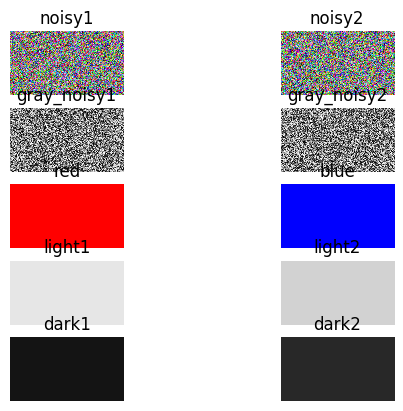

In [59]:
from matplotlib import pyplot as plt

plt.subplot(5, 2, 1)
plt.imshow(noisy1, interpolation='nearest')
plt.title('noisy1')
plt.axis('off')

plt.subplot(5, 2, 2)
plt.imshow(noisy2, interpolation='nearest')
plt.title('noisy2')
plt.axis('off')

plt.subplot(5, 2, 3)
plt.imshow(gray_noisy1, interpolation='nearest')
plt.title('gray_noisy1')
plt.axis('off')

plt.subplot(5, 2, 4)
plt.imshow(gray_noisy2, interpolation='nearest')
plt.title('gray_noisy2')
plt.axis('off')

plt.subplot(5, 2, 5)
plt.imshow(red, interpolation='nearest')
plt.title('red')
plt.axis('off')

plt.subplot(5, 2, 6)
plt.imshow(blue, interpolation='nearest')
plt.title('blue')
plt.axis('off')

plt.subplot(5, 2, 7)
plt.imshow(light1, interpolation='nearest')
plt.title('light1')
plt.axis('off')

plt.subplot(5, 2, 8)
plt.imshow(light2, interpolation='nearest')
plt.title('light2')
plt.axis('off')

plt.subplot(5, 2, 9)
plt.imshow(dark1, interpolation='nearest')
plt.title('dark1')
plt.axis('off')

plt.subplot(5, 2, 10)
plt.imshow(dark2, interpolation='nearest')
plt.title('dark2')
plt.axis('off')



- test image array들를 벡터화(vectorization) 하기

In [60]:
# 다차원를 1차원으로 vectorize(또는 직렬화)한다.
noisy1_vector = noisy1.reshape(-1)

# 그 결과를 255로 나누어 각 항목의 값이 0 ~ 1 사이의 float 값을 가지도록 한다.
noisy1_vector = noisy1_vector/255

noisy2_vector = noisy2.reshape(-1)/255

red_vector = red.reshape(-1)/255
blue_vector = blue.reshape(-1)/255

light1_vector = light1.reshape(-1)/255
light2_vector = light2.reshape(-1)/255
dark1_vector = dark1.reshape(-1)/255
dark2_vector = dark2.reshape(-1)/255
gray_noisy1_vector = gray_noisy1.reshape(-1)/255
gray_noisy2_vector = gray_noisy2.reshape(-1)/255

# 0과 1사이 난수 출력
print('noisy1_vector : ', noisy1_vector)

# 1에 근접하는 동일한 값 출력
print('light1_vector : ', light1_vector)

# 0에 근접하는 동일한 값 출력
print('dark1_vector : ', dark1_vector)

# 0, 0, 1, 0, 0, 1... 반복 출력
print('blue_vector : ', blue_vector)

# 0과 1사이 난수가 3회씩 반복 출력
print('gray_noisy1_vector : ', gray_noisy1_vector)


noisy1_vector :  [0.10196078 0.62352941 0.76470588 ... 0.73333333 0.83137255 0.7372549 ]
light1_vector :  [0.90196078 0.90196078 0.90196078 ... 0.90196078 0.90196078 0.90196078]
dark1_vector :  [0.07843137 0.07843137 0.07843137 ... 0.07843137 0.07843137 0.07843137]
blue_vector :  [0. 0. 1. ... 0. 0. 1.]
gray_noisy1_vector :  [0.14901961 0.14901961 0.14901961 ... 0.66666667 0.66666667 0.66666667]


- 쉽고 간단한 유사도 측정 방법 cosine similatiry 함수 소개

In [61]:
from numpy import dot
from numpy.linalg import norm

# cosine similatiry 함수
def cos_sim(A, B):
    return dot(A, B) / (norm(A) * norm(B))

- 그림 : cosine similarity 함수 이해
    - image vector의 모든 값은 0 ~ 1 이므로 마이너스 유사도(opposite vectors)는 나타나지 않음. 최소값은 0

(-0.5, 1919.5, 482.5, -0.5)

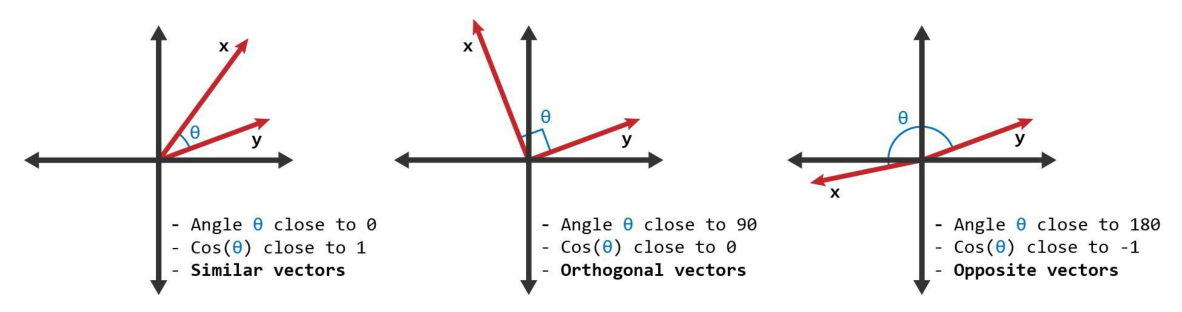

In [62]:
# 그림 : cosine similarity 함수 이해
import matplotlib.image as mpimg

# Load an image file
img = mpimg.imread('../media/cosine-similarity-vectors.jpg')

# Display the image
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')

- cosine similatiry 함수를 사용한 유사도 구하기

In [63]:
# dark1과 dark2 간 유사도
print('dark1과 dark2 간 유사도 : ', cos_sim(dark1_vector, dark2_vector))

# light1과 light2 간 유사도
print('light1과 light2 간 유사도 : ', cos_sim(light1_vector, light2_vector))

# dark와 light 간 유사도
print('dark와 light 간 유사도 : ', cos_sim(dark1_vector, light1_vector))

# 두 noisy 간 유사도
print('두 noisy 간 유사도 : ', cos_sim(noisy1_vector, noisy2_vector))

# 두 흑백 noisy 간 유사도
print('두 흑백 noisy 간 유사도 : ', cos_sim(gray_noisy1_vector, gray_noisy2_vector))

# red와 blue 간 유사도
print('red와 blue 간 유사도 : ', cos_sim(red_vector, blue_vector))

dark1과 dark2 간 유사도 :  1.0
light1과 light2 간 유사도 :  0.999999999999986
dark와 light 간 유사도 :  1.0000000000005216
두 noisy 간 유사도 :  0.7485482166824202
두 흑백 noisy 간 유사도 :  0.7494538584297739
red와 blue 간 유사도 :  0.0


### 따라 해보기 #2. 동영상의 연속되는 두 frame들간의 유사도 측정하기

- 연속되는 두 frame들간의 유사도를 구해서 차례로 list에 저장

In [68]:
# 이전 프레임 초기화
prev_frame = None

# 유사도 값을 저장할 list 변수 초기화
similarity_list = []

# 각 프레임별로 처리
for frame in video_array:

    # 1차원으로 reshape하고 255로 나눔
    current_vector = frame.reshape(-1) / 255

    # 첫번째 frame인 경우 건너뜀
    if prev_frame is not None:
        # 유사도 계산 및 similarity_list에 append
        similarity = cos_sim(prev_vector, current_vector)
        similarity_list.append(similarity)
            
    # 이전 프레임을 현재 프레임으로 업데이트
    prev_frame = frame.copy()
    # 이전 vector를 현재 vector로 업데이트
    prev_vector = current_vector.copy()

print('vector size : ',current_vector.shape)
print('similarity_list : ',similarity_list)

(706560,)


similarity_list :  [0.9964419952966105, 0.9963981505684881, 0.9970551029068071, 0.9965575012045997, 0.9961555609543441, 0.996113704610445, 0.9959069323728026, 0.9998834299547367, 0.9952035056742856, 0.9951126618413669, 0.9942843572084189, 0.9934897103513225, 0.9925680471089783, 0.991531252946157, 0.9901061080893402, 0.9897686149358831, 0.9901433637035068, 0.9898183047540638, 0.9917558133102224, 0.9931359355421434, 0.9938070619447694, 0.994613090649965, 0.9953003148867585, 0.9960236964510373, 0.9967647677908249, 0.9975729376801874, 0.997987761372326, 0.998251208461068, 0.9984214120744801, 0.9984699070715793, 0.9985302432698537, 0.9986110172930205, 0.9998987751689695, 0.9985551942752063, 0.9986362923712094, 0.9987434089351243, 0.9988409252467304, 0.99888441389816, 0.998901529640504, 0.9990115084889893, 0.9991268962760026, 0.9991698823986559, 0.9992008840406787, 0.99921505310653, 0.9992650812553373, 0.9992934210110497, 0.9993733226972328, 0.999375184129731, 0.9994471702715109, 0.999448704

- vertor size가 너무 커서(항목 개수 = 706560) 처리 시간이 오래걸려 50간격으로 slicing 하도록 수정

In [73]:
prev_frame = None

similarity_list2 = []

for frame in video_array:

    # 50간격으로 slicing 추가
    current_vector = (frame.reshape(-1) / 255)[::50]
    
    if prev_frame is not None:
        similarity = cos_sim(prev_vector, current_vector)
        similarity_list2.append(similarity)
            
    prev_frame = frame.copy()
    prev_vector = current_vector.copy()

print('vector size : ',current_vector.shape)
print('similarity_list2 : ',similarity_list2)

vector size :  (14132,)
similarity_list2 :  [0.9965556782704866, 0.9963188758663268, 0.9972557476651956, 0.9963949931261721, 0.9960811314941377, 0.9959977681900728, 0.9959799453885841, 0.9998853862441492, 0.9951735956823469, 0.9951788542961257, 0.9941927858767436, 0.9935472317194116, 0.9925335600940959, 0.9915691129719336, 0.9900426828373419, 0.989778257284791, 0.9900385291834689, 0.9898256843636845, 0.9917415012682913, 0.9931756265157857, 0.9936527118947919, 0.9945491226374817, 0.9951048166452072, 0.995978008728475, 0.9966931074780762, 0.9975610954213001, 0.9980420110400428, 0.9983118440014803, 0.9983495974715465, 0.9985254381045542, 0.998436328907572, 0.9987016287323704, 0.9999000492767239, 0.9984341984187916, 0.998789225917399, 0.998678876360487, 0.9987763101377168, 0.9989143390455391, 0.9989197428188942, 0.9990350275032637, 0.9990748319720667, 0.9992127542412087, 0.9991784575158145, 0.9992583138440908, 0.999252298131057, 0.9993199766458511, 0.9993883564948166, 0.9993661449455928, 0

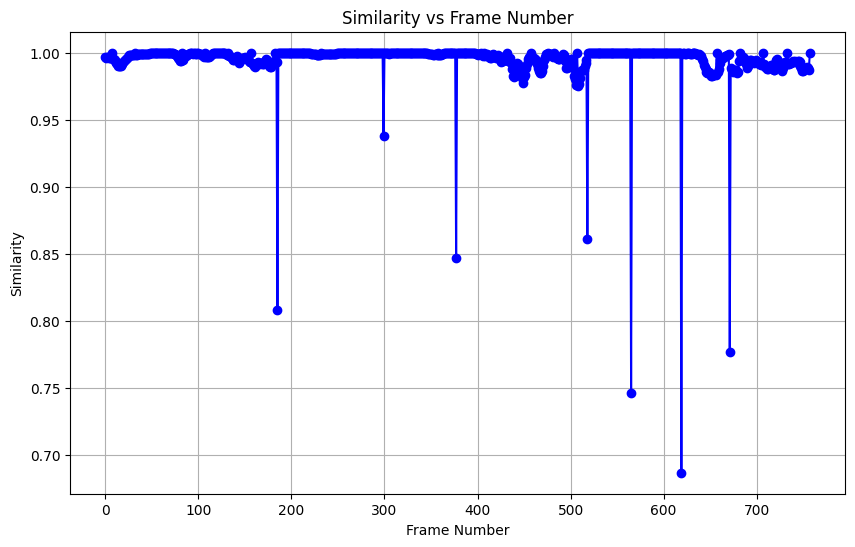

In [79]:
# similarity_list 꺾은선 그래프 그리기

plt.figure(figsize=(10, 6))
plt.plot(range(len(similarity_list)), similarity_list, marker='o', linestyle='-', color='b')
plt.xlabel('Frame Number')
plt.ylabel('Similarity')
plt.title('Similarity vs Frame Number')
plt.grid(True)

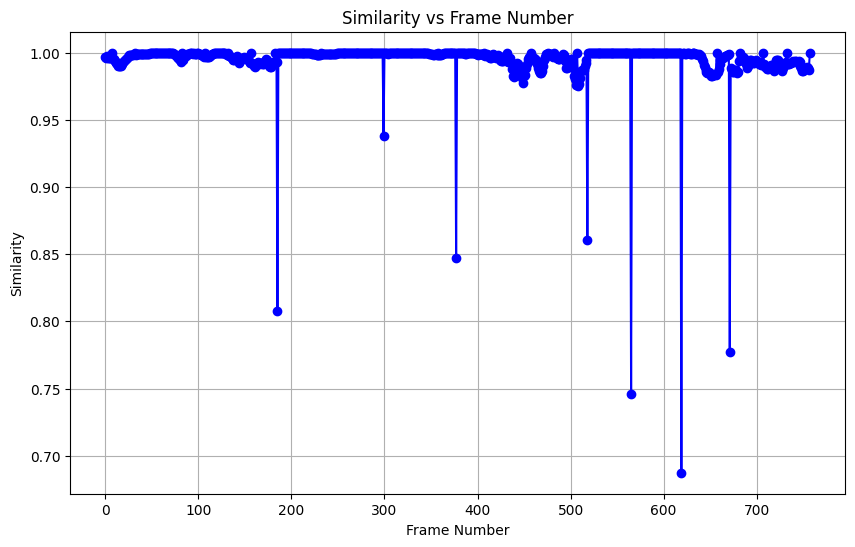

In [80]:
# similarity_list2 꺾은선 그래프 그리기

plt.figure(figsize=(10, 6))
plt.plot(range(len(similarity_list2)), similarity_list2, marker='o', linestyle='-', color='b')
plt.xlabel('Frame Number')
plt.ylabel('Similarity')
plt.title('Similarity vs Frame Number')
plt.grid(True)

- mp4 file의 video data를 numpy array 변수에 저장하기
- function을 실행하고 변경된 numpy array type의 video data를 return 값으로 받기
- return 값을 mp4 파일로 변환

In [ ]:
video_array, _, _ = video_2_ndarray('new_video.mp4')
new_video_array = cut_n_append2(video_array)
ndarray_2_video(new_video_array, 'new2_video.mp4')

# code 실행 후 생성된 동영상 파일을 실행한다.

### 따라 해보기 #2. decorator함수를 사용하여 내가 굳이 알 필요없는 부분을 은닉하자
- decorator함수를 작성한다.

In [ ]:
def modify_video(func):
    def wrapper(video_file, output_file):
        video_array, _, _ = video_2_ndarray(video_file)
        new_video_array = func(video_array)
        ndarray_2_video(new_video_array, output_file)

    return wrapper

- decorator함수를 사용하는 함수를 작성한다.

In [ ]:
@modify_video
def exchange_red_n_blue(video):
    
    new_video = video.copy()
    # R(빨간색) 값과 B(파란색) 값 바꾸기
    new_video[:, :, :, 0], new_video[:, :, :, 1] = video[:, :, :, 2], video[:, :, :, 0]

    return new_video

- decorator함수를 사용하는 함수를 실행한다.
    - parameter는 decorator 함수 안의 closure 함수(여기서는 wrapper) parameter를 사용해야 하는 것에 주의  

In [ ]:
exchange_red_n_blue('../media/SampleVideo_640x360_5mb.mp4', 'exchange_red_n_blue_video.mp4')

# code 실행 후 생성된 동영상 파일을 실행한다.

### 마음대로 해보기 #1. genAI를 사용하여 decorator함수를 만들고 실행해 보자

- (참고) ChatGPT 3.5에 사용한 질의와 답변

In [ ]:
"""
prompt :

다음은 python code 다.

video_array, _, _ = video_2_ndarray('video.mp4')
new_video_array = cut_n_append(video_array)
ndarray_2_video(new_video_array, 'new_video.mp4')
---
위의 code를 아래와 같이 바꾸도록 decorator 함수를 만들어줘

@modify_video
def function1(video_array)
    # 나의 code
    return new_video_array

# 아래 함수가 처음 3 line과 내용이 동일
function1('video.mp4', 'new_video.mp4')
"""

# ChatGPT 3.5 답변
import numpy as np

def modify_video(func):
    def wrapper(video_file, output_file):
        video_array, _, _ = video_2_ndarray(video_file)
        new_video_array = func(video_array)
        ndarray_2_video(new_video_array, output_file)

    return wrapper

@modify_video
def function1(video_array):
    # 나의 code
    return new_video_array

# 실행 예시
function1('video.mp4', 'new_video.mp4')